#### basic_mind
    superviskeyed learning（教師あり）: regression（回帰）classification（分類）
        keyword: 特徴量、正解データ
    unsupervised learning（教師なし）: clustering（クラスタリング）dimensionality reduction（次元削減）
    
#### 各関数：
df["].value_counts() 1列分のデータ別個数の集計
df["].unique() 1列分のデータを重複を除いて抽出
df.dropna(how="all" or "any", axis=0:row or 1:col)　None削除
df.drop(index or colname, axis= 0:row or 1:col) 行またはカラム名指定削除
df.loc[index, col] 特定の行列の抽出 :スライサOK
df["].fillna("replaceValue")欠損値補完
df.loc[:,from:to] インデックス、カラム名指定取得
df_none = df[df.isnull().any(axis=1)] None行の取得
df_if = df[(df[a]>0) & (df[y]=="val")] 行の条件取得

df.sharp　データフレームの全体概要出力
df.columns カラム名取得


pd.concat([df_A, df_B], axis=0:addRow or 1:addCol, how=?)
pd.merge

#### 描画
df.plot(kind="scatter", x=val, y=val) 散布図


#### 機械学習
pd.get_dummies(dataframe, drop_first=True) ダミーデータへ変換

with open("fileName",wb) as f; pickle.dump("saveModel",f) モデル保存
with open("fileName",rb) as f; pickle.load("saveModel",f)　モデル読み込み

標準化

from sklearn.model_selection import train_test_split データの分割 複数可
x1,x2, y1,y2 = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

from sklearn import tree 決定木 分類 class_weightは任意
model = tree.DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight="balanced")
model.fit(x,y)
score = model.score(x=x_tr, y=y_tr)

from sklearn.linear_model import LinearRegression　回帰
model = LinearRegression()
model.fit(x,y) x:train y=corect
pred_value = model.predict(x)


# 機械学習ラーニング　CHAPTER9　bank.csv

## 文字列データのダミー化

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("sukkiri-ml2-codes/datafiles/bank.csv")

colname = ["job","marital","education","default","housing","loan","contact"]
df_str = df.loc[:,colname]
df_dummy = pd.get_dummies(df_str, drop_first=True)
# Drop the original categorical columns from df
df_without_cat = df.drop(colname, axis=1)
# Concatenate the numerical columns with dummy variables horizontally
df2 = pd.concat([df_without_cat, df_dummy], axis=1)

## 訓練データとテストデータの分割、不要な項目を削除

In [6]:
drop_col = df2.drop(["id","age","amount","day","month"],axis=1)
train_val, test = train_test_split(drop_col,test_size=0.2,random_state=0)


## 機械学習による予測値の設定

In [8]:
# 機械学習による予測値
from sklearn.linear_model import LinearRegression
pred_tr_val = train_val.dropna()
# need to predict
pred_x = train_val[train_val.isnull().any(axis=1)]
x = pred_tr_val.drop(["duration"],axis=1)
y = pred_tr_val["duration"]
model = LinearRegression()
model.fit(x,y)
pred_x = pred_x.dropna(axis=1)
pred_y = model.predict(pred_x)
train_val.loc[train_val["duration"].isnull(), "duration"] = pred_y

## データの標準化

## 性能テスト

In [11]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler

def learn(x,t,depth=1): # 訓練データと検証データのスコアを返す処理
    x_tr, x_test, y_tr, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

    ##課題・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・
    # # 訓練データの標準化
    # sc_model_x = StandardScaler()
    # sc_model_y = StandardScaler()
    # sc_model_x.fit(x_tr)
    # sc_model_y.fit(y_tr)
    
    # sc_x_tr = sc_model_x.transform(x_tr)
    # sc_y_tr = sc_model_y.transform(y_tr)

    # model = tree.DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight="balanced")
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(x_tr, y_tr)
    
    # # 検証データの標準化
    # sc_x_val = sc_model_x.transform(x_test)
    # sc_y_val = sc_model_x.transform(y_test)

    score = model.score(x_tr, y_tr)
    score2 = model.score(x_test, y_test)
    
    return round(score,3), round(score2,3), model

x = train_val.drop("y",axis=1)
t = train_val["y"]
for i in range(1,15):
    tr_score, test_score, model = learn(x, t, i)
    print(f"深さ{i}：訓練スコア{tr_score} テストスコア{test_score}")

# 性能が高いモデルでテスト
tr_score, test_score, model = learn(x, t, 6)
_test = test.dropna()
x = _test.drop("y",axis=1)
y = _test["y"]

score = model.score(x, y)
print(f"実績スコア{round(score,3)}")



深さ1：訓練スコア0.768 テストスコア0.767
深さ2：訓練スコア0.768 テストスコア0.767
深さ3：訓練スコア0.775 テストスコア0.775
深さ4：訓練スコア0.786 テストスコア0.787
深さ5：訓練スコア0.798 テストスコア0.798
深さ6：訓練スコア0.807 テストスコア0.804
深さ7：訓練スコア0.819 テストスコア0.812
深さ8：訓練スコア0.828 テストスコア0.815
深さ9：訓練スコア0.841 テストスコア0.814
深さ10：訓練スコア0.854 テストスコア0.81
深さ11：訓練スコア0.866 テストスコア0.803
深さ12：訓練スコア0.882 テストスコア0.8
深さ13：訓練スコア0.897 テストスコア0.794
深さ14：訓練スコア0.91 テストスコア0.794
実績スコア0.724


## マハラノビスによる外れ値の除去

In [13]:
# from sklearn.covariance import MinCovDet
# mcd = MinCovDet(random_state=0, support_fraction=0.7)
# mcd.fit(train_val)
# distance = mcd.mahalanobis(train_val)
# s_distance = pd.Series(distance) 
# tmp=s_distance.describe()

# iqr = tmp["75%"] - tmp["25%"] #IRQ
# maxval = (iqr*1.5) + tmp["75%"]
# minval = tmp["25%"] - (iqr*1.5)

# clear_data = s_distance[(s_distance > maxval) &(minval > s_distance)]
# clear_data # 該当データなし


相関係数（上位10項目）:
duration                     0.453555
housing_yes                  0.197832
campaign                     0.146778
contact_sending _document    0.131849
loan_yes                     0.096758
marital_single               0.066403
marital_married              0.055259
job_student                  0.051178
job_blue-collar              0.039722
job_unemployed               0.030056
Name: y, dtype: float64


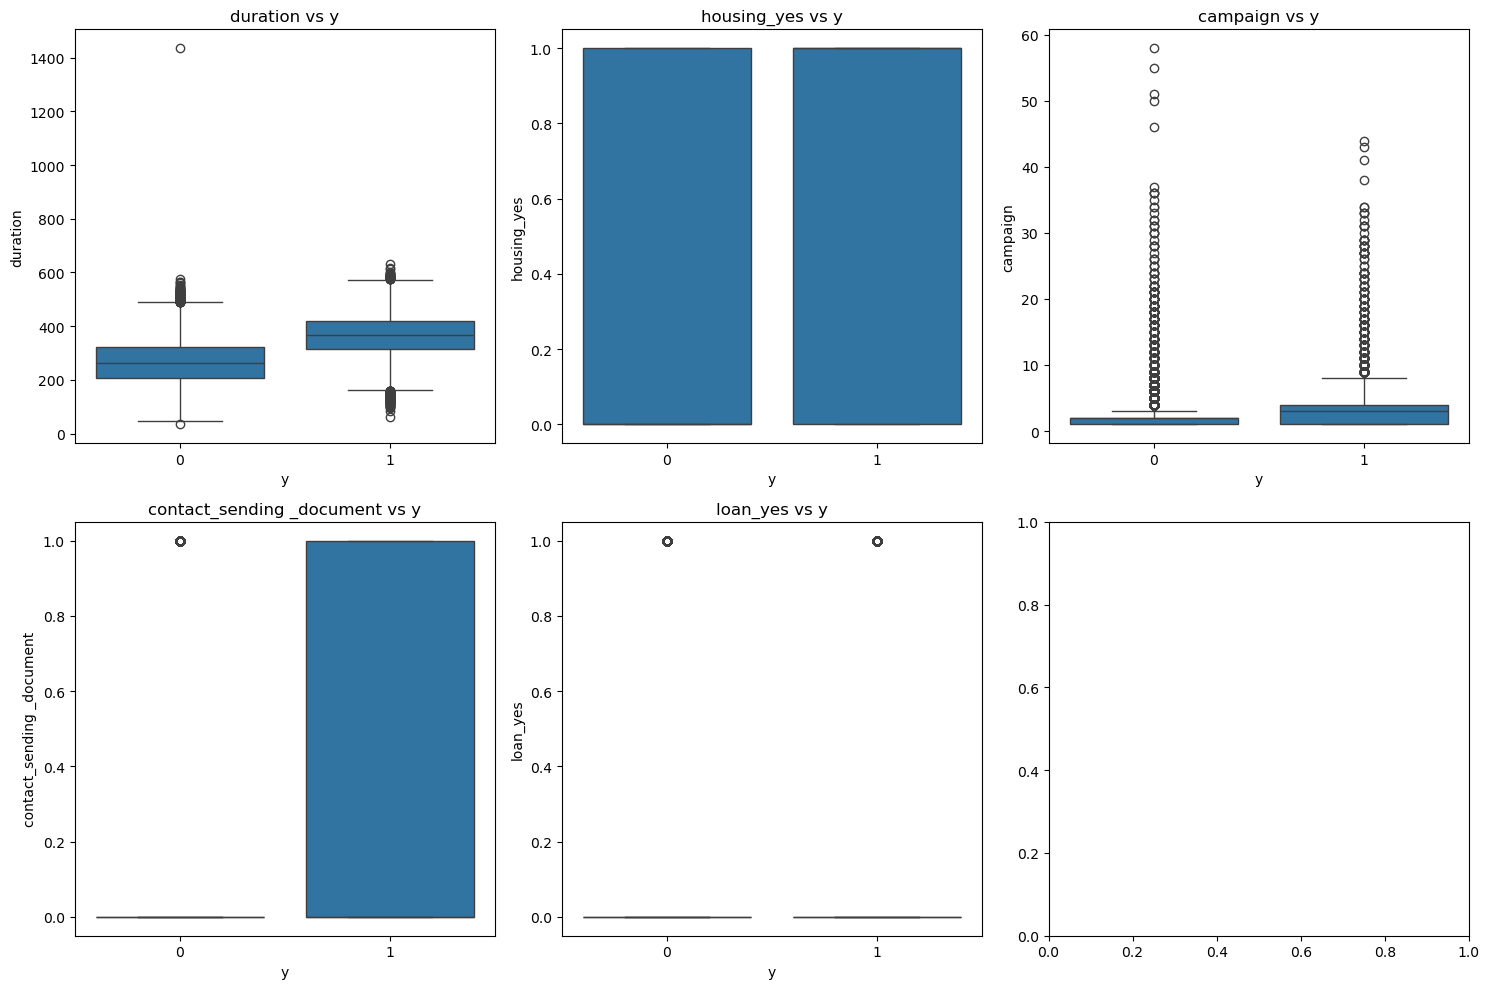

In [14]:

# 1. 相関係数を計算
# yと他の特徴量との相関係数を計算し、絶対値で降順にソート
correlations = train_val.corr()['y'].abs().sort_values(ascending=False)
print("相関係数（上位10項目）:")
print(correlations[1:11])  # yとの相関を除いて上位10項目を表示

# 2. より詳細な分析のために、特徴量とyの関係を可視化
import matplotlib.pyplot as plt
import seaborn as sns

# 相関係数上位5項目についてボックスプロットを作成
top_features = correlations[1:6].index
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    sns.boxplot(data=train_val, x='y', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs y')

plt.tight_layout()
plt.show()